In [305]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [306]:
postulantes_edu_df = pd.read_csv('fiuba_1_postulantes_educacion.csv')
postulantes_gye_df = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')
vistas_df = pd.read_csv('fiuba_3_vistas.csv')
postulaciones_df = pd.read_csv('fiuba_4_postulaciones.csv')
avisos_online_df = pd.read_csv('fiuba_5_avisos_online.csv')
avisos_detalle_df = pd.read_csv('fiuba_6_avisos_detalle.csv')

# Analizamos la informacion disponible

In [307]:
postulaciones_df.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion'], dtype='object')

In [308]:
#Verificamos que no haya nulos en las columnas del dataframe
print(postulaciones_df['idaviso'].isnull().any())
print(postulaciones_df['fechapostulacion'].isnull().any())
print(postulaciones_df['idpostulante'].isnull().any())


False
False
False


In [309]:
avisos_detalle_df.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [310]:
print(avisos_detalle_df['idaviso'].isnull().any())
print(avisos_detalle_df['idpais'].isnull().any())
print(avisos_detalle_df['titulo'].isnull().any())
print(avisos_detalle_df['mapacalle'].isnull().any())
print(avisos_detalle_df['tipo_de_trabajo'].isnull().any())
print(avisos_detalle_df['nivel_laboral'].isnull().any())
print(avisos_detalle_df['nombre_area'].isnull().any())
print(avisos_detalle_df['descripcion'].isnull().any())
print(avisos_detalle_df['titulo'].isnull().any())
print(avisos_detalle_df['idaviso'].isnull().any())
print(avisos_detalle_df['ciudad'].isnull().any())
print(avisos_detalle_df['nombre_zona'].isnull().any())

False
False
False
True
False
False
False
False
False
False
True
False


In [311]:
#Observo que solo 47 avisos de 13mil tienen ciudad especificada.
#No es suficiente como para generalizar conclusiones.
#Eliminamos la columna "ciudad"
print(avisos_detalle_df['ciudad'].shape)
print(avisos_detalle_df['ciudad'].count())
avisos_detalle_df = avisos_detalle_df.drop('ciudad', 1)


(13534,)
47


In [312]:
#Observamos que la columna "idpais" siempre tiene el mismo valor.
print(avisos_detalle_df['idpais'].value_counts())


1    13534
Name: idpais, dtype: int64


In [313]:
#Como no brinda informacion relevante, la eliminamos.
avisos_detalle_df = avisos_detalle_df.drop('idpais',1)

In [314]:
#Observamos que la informacion utilizable hace referencia a CABA vs GBA, por lo tanto descartamos los demas.
print(avisos_detalle_df['nombre_zona'].value_counts())
avisos_detalle_df = avisos_detalle_df[ (avisos_detalle_df['nombre_zona'] == 'GBA Oeste') == False]
avisos_detalle_df = avisos_detalle_df[ (avisos_detalle_df['nombre_zona'] == 'Buenos Aires (fuera de GBA)') == False]
print()
print(avisos_detalle_df['nombre_zona'].value_counts())



Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

Gran Buenos Aires    12654
Capital Federal        876
Name: nombre_zona, dtype: int64


In [315]:
#Vemos que los datos del archivo de vistas son limitados a unos pocos dias del mes de febrero y solo un dia de marzo.
vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])
print(vistas_df['timestamp'].dt.day.value_counts())
print(vistas_df['timestamp'].dt.month.value_counts())

27    232145
26    227957
28    227160
24     95930
25     90646
23     47236
1      40823
Name: timestamp, dtype: int64
2    921074
3     40823
Name: timestamp, dtype: int64


In [316]:
#Observamos que tanto para el dia 23 como para el dia 1, hay muy poca informacion.
df = vistas_df[vistas_df['timestamp'].dt.day == 1 ]
print(df['timestamp'].dt.hour.value_counts())
df = vistas_df[vistas_df['timestamp'].dt.day == 23 ]
print(df['timestamp'].dt.hour.value_counts())

0    9830
1    9810
2    9283
3    7163
4    4737
Name: timestamp, dtype: int64
19    10370
20     9644
21     9081
22     7181
23     7041
18     3919
Name: timestamp, dtype: int64


In [317]:
#Al trabajar con los datos de los postulantes, se ve que hay fechas nulas.
print(postulantes_gye_df.isnull().any())
print()
print(postulantes_gye_df['fechanacimiento'].isnull().value_counts())
print()
print('True indica la cantidad de fechas nulas.')


idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

False    196138
True       4750
Name: fechanacimiento, dtype: int64

True indica la cantidad de fechas nulas.


In [318]:
postulantes_gye_df['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [319]:
#Se ve que la mayoria de entradas con fecha nula, estan asociadas a sexo no declarado.
postulantes_gye_df = postulantes_gye_df.dropna()
postulantes_gye_df['sexo'].value_counts()

FEM           101677
MASC           94016
NO_DECLARA       445
Name: sexo, dtype: int64

In [320]:
#Como la cantidad de entradas con sexo no declarado bajo considerablemente, no es suficiente como para generalizar.
#Eliminamos esas entradas
postulantes_gye_df = postulantes_gye_df[ (postulantes_gye_df['sexo'] == 'NO_DECLARA') == False]


In [321]:
postulantes_gye_df['sexo'].value_counts()

FEM     101677
MASC     94016
Name: sexo, dtype: int64

In [322]:
#Tambien en este archivo se puede ver que hay fechas anormales, que seran filtradas luego dependiendo de que se busca averiguar.
print('Entradas con fechas incorrectas :')
print(postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')])

Entradas con fechas incorrectas :
       idpostulante fechanacimiento  sexo
56206       xkPwXwY      0031-12-11   FEM
71458       LN85Y3b      0029-05-11  MASC
130846      8M2R6pz      0024-02-09   FEM
141832      A36Npjj      0033-09-14   FEM
148638      GNZOvAv      0004-07-19  MASC
149653      1QPQ8QL      0011-03-08  MASC


In [323]:
#Analizando la cantidad de postulaciones por usuario, nos encontramos con tres casos atipicos donde se supera holgadamente el promedio
#de postulaciones por usuario.
#Sin embargo los datos son irrelevantes a la hora de analizar el archivo en su totalidad.
print(postulaciones_df['idpostulante'].value_counts().head(5))
print()
print('El promedio de postulaciones por usuario es: ', postulaciones_df['idpostulante'].value_counts().mean() )

axmjOE     3166
6rQdqjl    1773
5Mwjak     1485
8MaQjP3    1414
4rNzLje    1213
Name: idpostulante, dtype: int64

El promedio de postulaciones por usuario es:  16.93293277846362


In [324]:
#A la hora de analizar la descripcion de los avisos, se puede ver que varios de ellos son de otras provincias.
#Esta informacion relevante no figura en ninguna columna del set de datos.


df = avisos_detalle_df[avisos_detalle_df['descripcion'].str.contains('Cordoba')]
df = df['descripcion'].value_counts().to_frame().reset_index()
df.iloc[2,0]


'<p>En\xa0<strong>Garbarino</strong>\xa0nos encontramos en la búsqueda de nuevos talentos para sumarse a nuestras sucursales en Cordoba:</p><p>\xa0<strong><u>Sus principales tareas serán</u></strong><strong>:</strong></p><ul><li>Asesoramiento a clientes.</li><li>Venta de productos.</li><li>Cierre de operaciones.</li></ul><p><strong><u>Requisitos</u></strong><strong>:</strong></p><ul><li>Edad: entre 18 a 30 años.</li><li>Secundario Competo.</li><li>Experiencia en comunicación e interrelación con clientes.</li><li>Perfil comercial, proactivo y Multi-Tasking.</li><li>Orientación al cliente.</li></ul><p><strong><u>Condiciones de Contratación</u></strong><strong>:</strong></p><ul><li>Lugar de trabajo: Cordoba.</li><li>Jornada laboral: Full Time\xa0(inluyendo sabados y domingos) con horarios rotativos.</li></ul><p>\xa0</p><p>¡TE ESPERAMOS!</p>'

In [325]:
#Otro ejemplo con mendoza.
df = avisos_detalle_df[avisos_detalle_df['descripcion'].str.contains('Mendoza')]
df = df['descripcion'].value_counts().to_frame().reset_index()
df.iloc[5,0]

'<p>Nuestro cliente, importante empresa de servicios, \xa0se encuentra en la búsqueda de un <strong>Gerente de Experiencia y Servicios</strong> para la Unidad de Mendoza</p><p>Responsabilidades de la posición:</p><p>\xa0</p><p>\x95\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Gestionar las estrategias de atención al Cliente en los aeropuertos de la Región</p><p>\x95\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Gestionar las estrategias del Servicio \x93Aeropuertos Vip Club\x94</p><p>\x95\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Controlar procesos y flujos de pasajeros en las terminales</p><p>\x95\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Controlar la aplicación de los contratos de servicio en Terminales</p><p>\x95\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Controlar la calidad de servicio e infraestructura a disposición de los pasajeros</p><p>\x95\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 Diseñar y administrar acciones de Marketing (Activaciones &amp; Even

In [326]:
#La cantidad de informacion sobre mapacalle coincide con la cantidad de avisos en capital federal.

print(avisos_detalle_df[avisos_detalle_df['nombre_zona'] == 'Capital Federal'].shape)
print()
print(avisos_detalle_df['mapacalle'].count())

(876, 9)

871


In [327]:
#Filtro para avisos en capital federal y observo que el mapacalle esta solamente asociado a los avisos en CABA

print(avisos_detalle_df['mapacalle'].count())
avisos_caba_df = avisos_detalle_df[avisos_detalle_df['nombre_zona'] == 'Capital Federal']
print(avisos_caba_df.shape)
print(avisos_caba_df['mapacalle'].count())

871
(876, 9)
871


In [328]:
avisos_caba_df.head()

,idaviso,titulo,descripcion,nombre_zona,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
2,1000150677,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
8,9240880,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
24,1110640622,Agente Inmobiliario para Oficinas RE/MAX en Zo...,"<p>Si te gusta deleitar a tus clientes, brinda...",Capital Federal,Gobernador Irigoyen 56,Full-time,Senior / Semi-Senior,Comercial,RE/MAX TITANIUM
34,1111035451,Checker de procesos (laboratorio),<p>Importante laboratorio farmacéutico naciona...,Capital Federal,Cochabamba 2525,Full-time,Senior / Semi-Senior,Farmacéutica,GI GROUP Argentina
46,1111174081,Gestor de Cobranzas - Telecobrador,<p><strong>En MAS ACTIVOS BPO te estamos esper...,Capital Federal,ALEM 116,Part-time,Senior / Semi-Senior,Call Center,MAS ACTIVOS S.A.


# ¿Que nivel laboral tiene mayor oferta y demanda?

In [329]:
#Comenzamos uniendo los datos de los archivos de avisos y postulaciones.
merge_detalle_postulaciones_df = postulaciones_df.merge(avisos_detalle_df, on = 'idaviso')

In [330]:
#Confirmamos que la union se hizo correctamente
print(merge_detalle_postulaciones_df.count())
merge_detalle_postulaciones_df.head()

idaviso                 3073975
idpostulante            3073975
fechapostulacion        3073975
titulo                  3073975
descripcion             3073975
nombre_zona             3073975
mapacalle                205266
tipo_de_trabajo         3073975
nivel_laboral           3073975
nombre_area             3073975
denominacion_empresa    3073725
dtype: int64


,idaviso,idpostulante,fechapostulacion,titulo,descripcion,nombre_zona,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1112257047,NM5M,2018-01-15 16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,1112257047,1kJqGb,2018-01-15 10:23:11,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,1112257047,eOE9Rr,2018-01-15 10:42:07,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,1112257047,ZrKNQY,2018-01-16 17:19:38,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [331]:
#Se identifican las variables categoricas de la columna "nivel Laboral"
avisos_detalle_df['nivel_laboral'].unique()

array(['Senior / Semi-Senior', 'Junior',
       'Jefe / Supervisor / Responsable', 'Otro',
       'Gerencia / Alta Gerencia / Dirección'], dtype=object)

In [332]:
avisos_detalle_df['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9406
Junior                                  2215
Otro                                     919
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Text(0,0.5,'Nivel laboral')

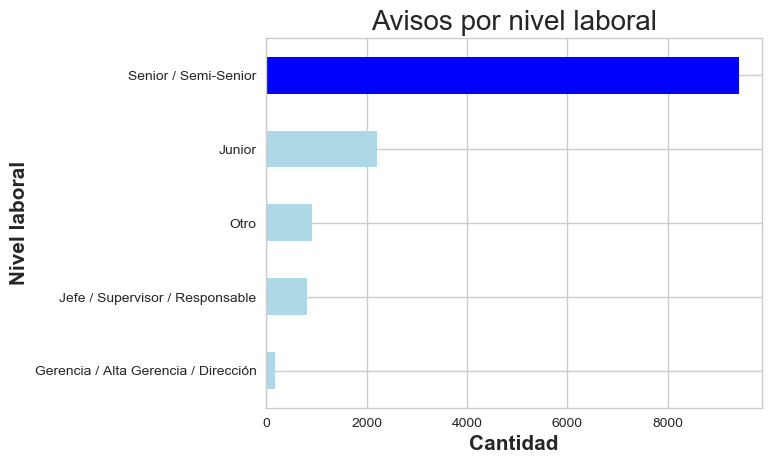

In [333]:
#Ahora graficamos la cantidad de avisos para cada nivel laboral, usando solo el archivo de avisos.
avisos_por_nivel = avisos_detalle_df['nivel_laboral'].value_counts(ascending = True).plot(kind = 'barh', color = ['lightblue','lightblue','lightblue','lightblue','blue'])
avisos_por_nivel.set_title("Avisos por nivel laboral", fontsize = 20)
avisos_por_nivel.set_xlabel("Cantidad", fontsize = 15, weight = 'bold')
avisos_por_nivel.set_ylabel("Nivel laboral", fontsize = 15, weight = 'bold')

Text(0,0.5,'Nivel laboral')

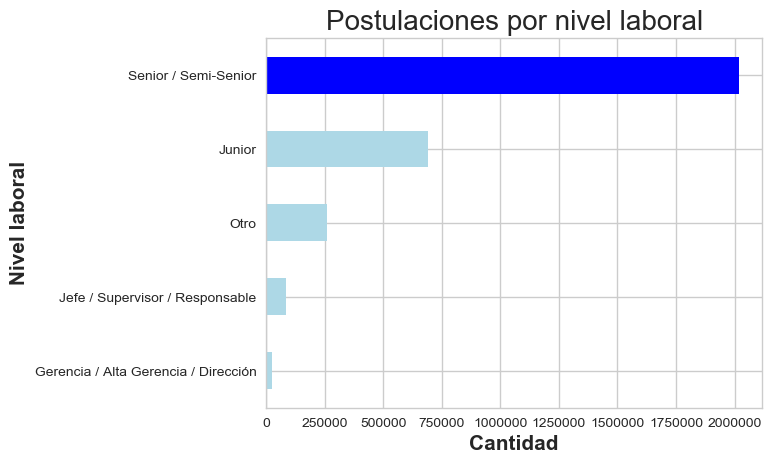

In [334]:
#Ahora lo mismo que antes, pero con el data frame que une los datos.
postulaciones_por_nivel = merge_detalle_postulaciones_df['nivel_laboral'].value_counts(ascending=True).plot(kind = 'barh',color = ['lightblue','lightblue','lightblue','lightblue','blue'])
postulaciones_por_nivel.set_title("Postulaciones por nivel laboral", fontsize = 20)
postulaciones_por_nivel.set_xlabel("Cantidad", fontsize = 15, weight = 'bold')
postulaciones_por_nivel.set_ylabel("Nivel laboral", fontsize = 15, weight = 'bold')

Como se puede ver, ambos gráficos son de aspecto similar, por lo que se mantiene la relación de oferta y demanda para los diferentes niveles laborales. Claramente el nivel mas apuntado por las empresas a la hora de buscar postulantes es Senior / Semi-Senior, y a su vez es el nivel con mayor demanda, lo que puede indicar que es el sector mas activo del mundo laboral.

#  ¿Como es la relacion entre oferta y demanda en las diferentes areas laborales?

Text(0,0.5,'Area')

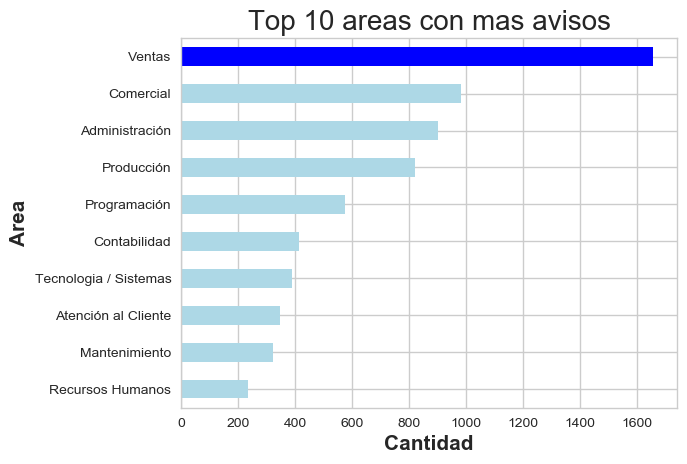

In [335]:
#Comenzamos con un grafico que muestra el Top 10 de areas con mas avisos.
avisos_por_nombre_area = avisos_detalle_df['nombre_area'].value_counts().head(10).sort_values().plot(kind = 'barh',color = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','blue'])
avisos_por_nombre_area.set_title("Top 10 areas con mas avisos", fontsize = 20)
avisos_por_nombre_area.set_xlabel("Cantidad",fontsize = 15, weight = 'bold')
avisos_por_nombre_area.set_ylabel("Area", fontsize = 15, weight = 'bold')

Text(0,0.5,'Area')

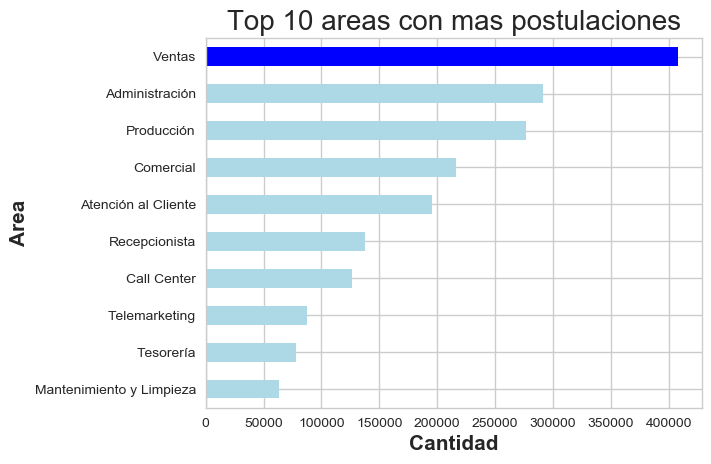

In [336]:
#Ahora lo mismo pero para las potulaciones.
postulaciones_por_nombre_area = merge_detalle_postulaciones_df['nombre_area'].value_counts().head(10).sort_values().plot(kind = 'barh',color = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','blue'])
postulaciones_por_nombre_area.set_title("Top 10 areas con mas postulaciones", fontsize = 20)
postulaciones_por_nombre_area.set_xlabel("Cantidad",fontsize = 15, weight = 'bold')
postulaciones_por_nombre_area.set_ylabel("Area", fontsize = 15, weight = 'bold')

Empezamos a relacionar la cantidad de postulaciones con la cantidad de avisos. La condicion esta dada por el 25% del promedio de avisos aproximadamente.

In [337]:
merge = avisos_detalle_df['nombre_area'].value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_avisos']
merge.columns = columnas
merge = merge[(merge['cantidad_avisos']) > 30]
merge.head()

,nombre_area,cantidad_avisos
0,Ventas,1658
1,Comercial,983
2,Administración,901
3,Producción,821
4,Programación,576


In [338]:
df = merge_detalle_postulaciones_df['nombre_area'].value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_postulaciones']
df.columns = columnas

df.head()

,nombre_area,cantidad_postulaciones
0,Ventas,408148
1,Administración,291135
2,Producción,277089
3,Comercial,216677
4,Atención al Cliente,195636


In [339]:
merge = merge.merge(df, on = 'nombre_area')
merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones
0,Ventas,1658,408148
1,Comercial,983,216677
2,Administración,901,291135
3,Producción,821,277089
4,Programación,576,8188


In [340]:
#Obtenemos la relacion postulaciones/avisos.
merge['postulaciones/avisos'] = ( merge['cantidad_postulaciones'] ) / (merge['cantidad_avisos'] )

merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones,postulaciones/avisos
0,Ventas,1658,408148,246.168878
1,Comercial,983,216677,220.424212
2,Administración,901,291135,323.124306
3,Producción,821,277089,337.501827
4,Programación,576,8188,14.215278


Text(0,0.5,'Area')

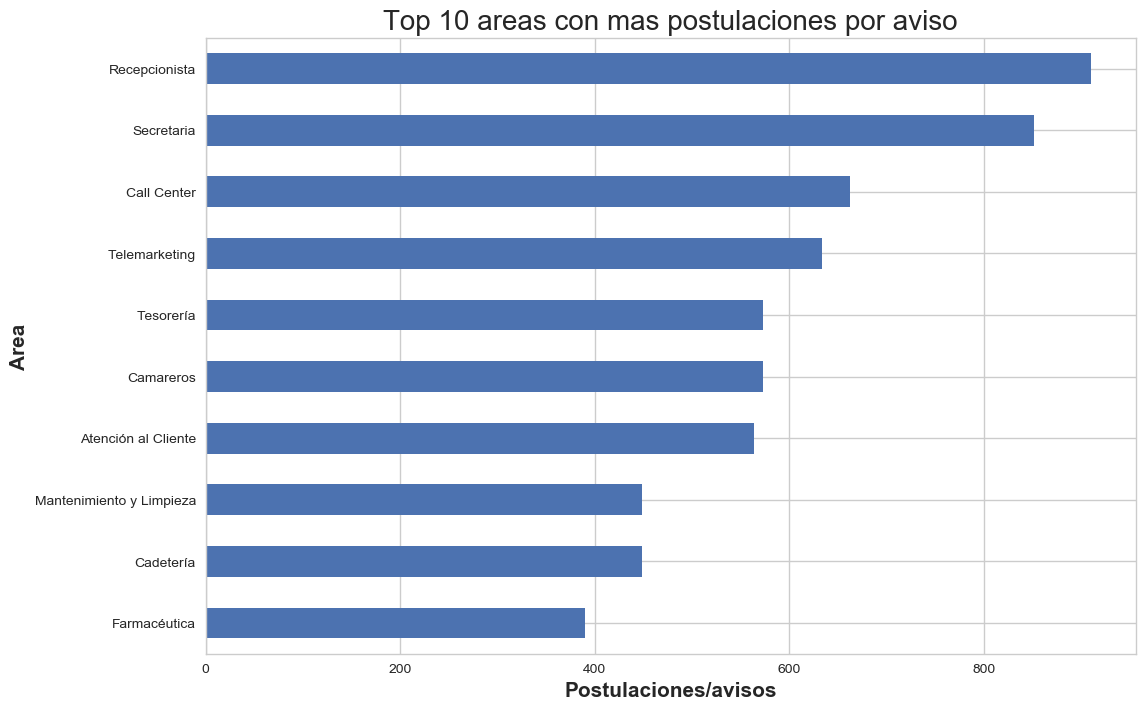

In [341]:
#Grafico de relacion entre cantidad de postulaciones y cantidad de avisos por nombre de area.
g = merge.groupby('nombre_area').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos',ascending = False).head(10).sort_values(by='postulaciones/avisos').plot(kind = 'barh',figsize = (12,8),legend = False)
g.set_title('Top 10 areas con mas postulaciones por aviso', fontsize=20)
g.set_xlabel("Postulaciones/avisos", fontsize = 15, weight = 'bold')
g.set_ylabel("Area", fontsize = 15, weight = 'bold')

Text(0,0.5,'Area')

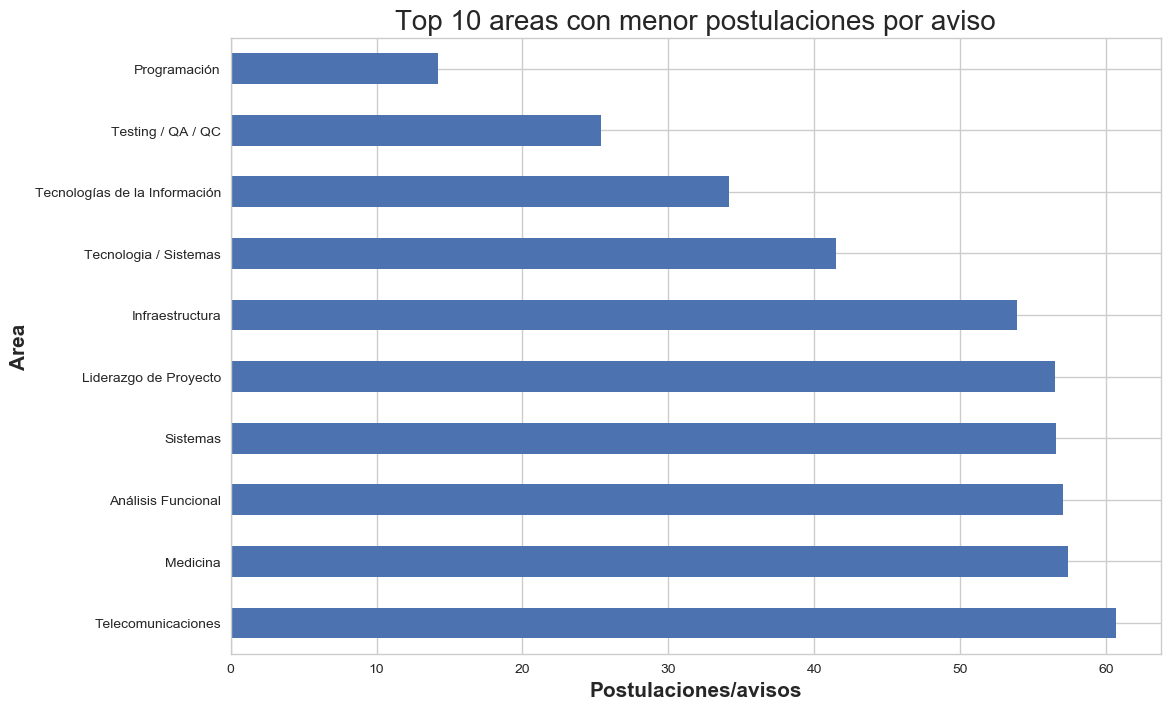

In [342]:
g = merge.groupby('nombre_area').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos',ascending = False).tail(10).plot(kind = 'barh',figsize = (12,8),legend = False)
g.set_title('Top 10 areas con menor postulaciones por aviso', fontsize=20)
g.set_xlabel("Postulaciones/avisos", fontsize = 15, weight = 'bold')
g.set_ylabel("Area", fontsize = 15, weight = 'bold')

Conclusión: Programacion es el area que menor demanda tiene en relacion a su oferta, siendo que por cada aviso relacionado a programacion en promedio se postulan menos de 20 personas, en contraste con Recepcionista, a la cual por cada aviso se postulan en promedio mas de 800 personas.
Tambien se observa que el mayor volumen de postulaciones se obtienen por trabajos no calificados, mientras que los que menos postulaciones tienen lo son (en mayor medida relacionados al rubro de la informatica).

# ¿Alguna empresa esta acaparando mas postulaciones que las demás en relacion con su cantidad de avisos?

Text(0,0.5,'Empresas')

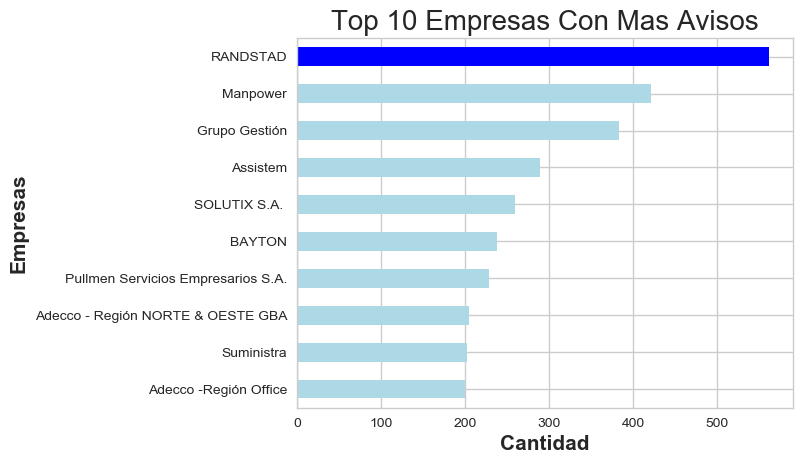

In [343]:
empresas_con_mas_avisos = avisos_detalle_df['denominacion_empresa'].value_counts().head(10).sort_values().plot(kind = 'barh', color = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','blue'])
empresas_con_mas_avisos.set_title("Top 10 Empresas Con Mas Avisos", fontsize = 20)
empresas_con_mas_avisos.set_xlabel('Cantidad', fontsize = 15, weight = 'bold')
empresas_con_mas_avisos.set_ylabel('Empresas', fontsize = 15, weight = 'bold')

Text(0,0.5,'Empresas')

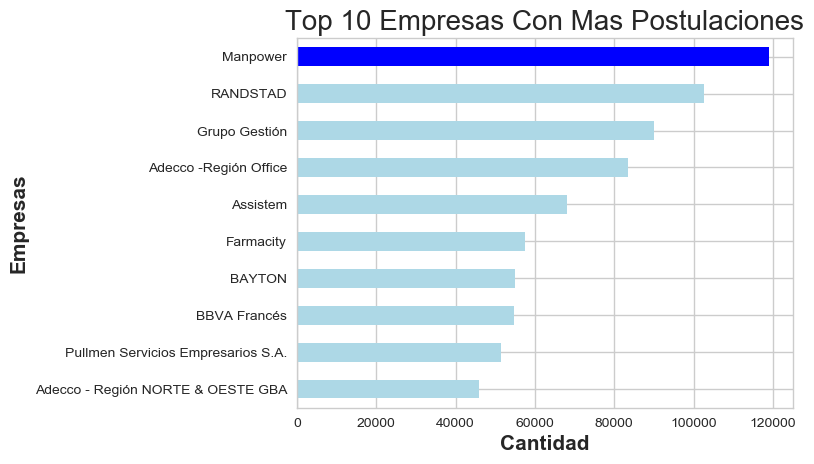

In [344]:
empresas_con_mas_postulaciones = merge_detalle_postulaciones_df['denominacion_empresa'].value_counts().head(10).sort_values().plot(kind = 'barh', color = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','blue'])
empresas_con_mas_postulaciones.set_title("Top 10 Empresas Con Mas Postulaciones", fontsize = 20)
empresas_con_mas_postulaciones.set_xlabel('Cantidad', fontsize = 15, weight = 'bold')
empresas_con_mas_postulaciones.set_ylabel('Empresas', fontsize = 15, weight = 'bold')

Ahora vemos la relacion entre postulaciones y avisos pero con las empresas.

In [345]:
#Teniendo en cuenta la ecuacion de Moivre, la desviacion estandard y el promedio de avisos por empresas, decidmos filtrar por empresas con mas de 20 avisos.
merge = avisos_detalle_df['denominacion_empresa'].value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_avisos']
merge.columns = columnas
print(merge['cantidad_avisos'].describe())
merge = merge[ (merge['cantidad_avisos'] > 20 ) ]
merge.head()

count    2591.000000
mean        5.219992
std        22.325433
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       562.000000
Name: cantidad_avisos, dtype: float64


,denominacion_empresa,cantidad_avisos
0,RANDSTAD,562
1,Manpower,421
2,Grupo Gestión,383
3,Assistem,289
4,SOLUTIX S.A.,260


In [346]:
df = merge_detalle_postulaciones_df['denominacion_empresa'].value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_postulaciones']
df.columns = columnas
df.head()

,denominacion_empresa,cantidad_postulaciones
0,Manpower,119013
1,RANDSTAD,102640
2,Grupo Gestión,89950
3,Adecco -Región Office,83530
4,Assistem,68125


In [347]:
merge = merge.merge(df, on = 'denominacion_empresa')
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones
0,RANDSTAD,562,102640
1,Manpower,421,119013
2,Grupo Gestión,383,89950
3,Assistem,289,68125
4,SOLUTIX S.A.,260,8206


In [348]:
#Obtenemos la relacion.
merge['postulaciones/avisos'] = ( merge['cantidad_postulaciones'] / merge['cantidad_avisos'])
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones,postulaciones/avisos
0,RANDSTAD,562,102640,182.633452
1,Manpower,421,119013,282.691211
2,Grupo Gestión,383,89950,234.856397
3,Assistem,289,68125,235.726644
4,SOLUTIX S.A.,260,8206,31.561538


Text(0,0.5,'Empresas')

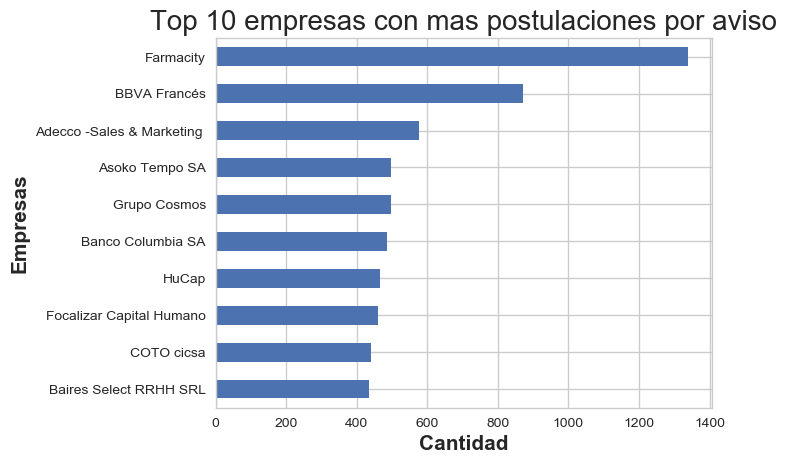

In [349]:
#Grafico de relacion entre postulaciones y avisos.
plot = merge.groupby('denominacion_empresa').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos', ascending = False).head(10).sort_values(by = 'postulaciones/avisos').plot(kind = 'barh',legend = False)
plot.set_title('Top 10 empresas con mas postulaciones por aviso', fontsize = 20)
plot.set_xlabel('Cantidad', fontsize = 15, weight = 'bold')
plot.set_ylabel('Empresas', fontsize = 15, weight = 'bold')
#Grafico de relacion entre postulaciones y avisos (por empresa)

Text(0,0.5,'Empresas')

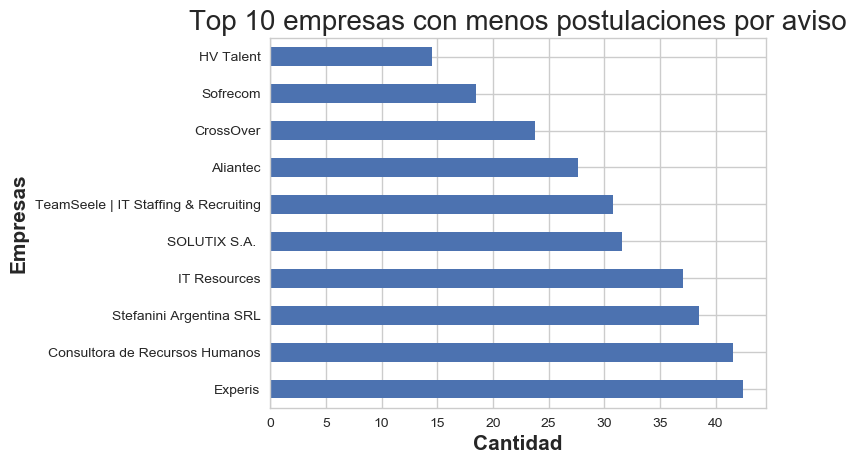

In [350]:
plot = merge.groupby('denominacion_empresa').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos', ascending = False).tail(10).plot(kind = 'barh', legend = False)
plot.set_title('Top 10 empresas con menos postulaciones por aviso', fontsize = 20)
plot.set_xlabel('Cantidad', fontsize = 15, weight = 'bold')
plot.set_ylabel('Empresas', fontsize = 15, weight = 'bold')
#Grafico de relacion entre postulaciones y avisos (por empresa)

Nuevamente, las empresas relacionadas a informatica son las que menor cantidad de postulantes tienen.

# (aca empieza otra pregunta)

Para hallar la relacion entre nivel laboral y edad media de los postulantes se descartan los usuarios con fechas nulas o incorrectas.

In [351]:
#Hay fechas que no son correctas, las saco.
print('Cantidad original: 196138')
print('')
print('Fechas incorrectas :')
print(postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')])
print('')
print('Cantidad de fechas incorrectas: ' , postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')].shape)
df = postulantes_gye_df[ (postulantes_gye_df['fechanacimiento'].str.startswith('00')) == False]
print('')
print('Cantidad sin fechas incorrectas : ', df.shape)


Cantidad original: 196138

Fechas incorrectas :
       idpostulante fechanacimiento  sexo
56206       xkPwXwY      0031-12-11   FEM
71458       LN85Y3b      0029-05-11  MASC
130846      8M2R6pz      0024-02-09   FEM
141832      A36Npjj      0033-09-14   FEM
148638      GNZOvAv      0004-07-19  MASC
149653      1QPQ8QL      0011-03-08  MASC

Cantidad de fechas incorrectas:  (6, 3)

Cantidad sin fechas incorrectas :  (195687, 3)


In [352]:
#Ahora, sin las fechas incorrectas, puedo calcular la edad promedio.
df.fechanacimiento = pd.to_datetime(df.fechanacimiento)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195687 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       195687 non-null object
fechanacimiento    195687 non-null datetime64[ns]
sexo               195687 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 6.0+ MB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [353]:
#Calculo la edad de los postulantes y agrego la columna.
df['edad'] = (2018 - df.fechanacimiento.dt.year)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,48
1,5awk,1962-12-04,FEM,56
2,ZaO5,1978-08-10,FEM,40
3,NdJl,1969-05-09,MASC,49
4,eo2p,1981-02-16,MASC,37


In [354]:
#Hay postulantes con edades anormales, tambien los saco
print('Postualantes con edad incorrecta: ')
print(df[ ( df['edad'] > 70) | (df['edad'] < 18) ])

df = df[ ( (df['edad'] > 70) | (df['edad'] < 18) ) == False ]



Postualantes con edad incorrecta: 
       idpostulante fechanacimiento  sexo  edad
520          52DWRk      1946-12-03  MASC    72
6869         a5qWAm      2006-01-01  MASC    12
11671        epKzQ8      1944-03-23  MASC    74
15039        NqkN3L      1942-08-21   FEM    76
17969        ZBXbxP      1943-03-17  MASC    75
25080        8YZmej      1943-02-07  MASC    75
41689       A3AAAv5      1947-07-27  MASC    71
44744       GNJmLNv      1946-06-16  MASC    72
49323       JBmkewO      1947-10-13  MASC    71
52616       EzpKa56      1947-06-30   FEM    71
55962       ZDaVBez      1942-07-16  MASC    76
63142       Pma4rYv      1947-01-21   FEM    71
64272       bO4WQVY      1944-08-02  MASC    74
83825       xkppYAY      1939-07-27  MASC    79
97800       8ML48lz      1947-07-12  MASC    71
98648       bOAkpEq      1944-11-13  MASC    74
99345       6rLd8RL      1941-09-21  MASC    77
115060      VNP3DZE      1947-12-04  MASC    71
145374      EzeD402      1947-11-27   FEM    71
15455

Text(0,0.5,'Cantidad')

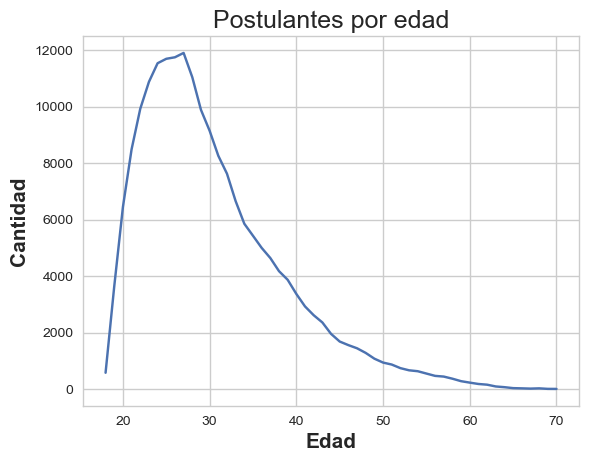

In [355]:
#Visualizacion de las postulaciones segun la edad del postulante.
g = df.edad.value_counts().sort_index().plot()
g.set_title('Postulantes por edad', fontsize=18)
g.set_xlabel('Edad', fontsize = 15, weight = 'bold')
g.set_ylabel('Cantidad', fontsize = 15, weight = 'bold')

In [356]:
#Ahora junto la informacion de las edades con el data frame de postulaciones-avisos.
merge = merge_detalle_postulaciones_df.merge(df, on = 'idpostulante')
merge.head()
print(merge.shape)

(3028479, 14)


Text(0,0.5,'Nivel laboral')

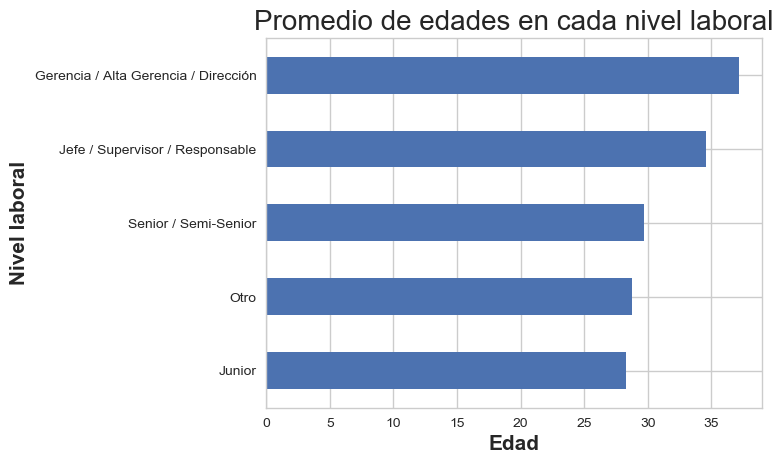

In [357]:
#Relaizamos un grafico de barras para mostrar la edad promedio de cada nivel laboral.
g = merge.groupby('nivel_laboral').agg({'edad':'mean'}).sort_values(by = 'edad').plot(kind = 'barh', legend = False)
g.set_title('Promedio de edades en cada nivel laboral', fontsize = 20)
g.set_xlabel('Edad', fontsize = 15, weight = 'bold')
g.set_ylabel('Nivel laboral', fontsize = 15, weight = 'bold')

In [358]:
#ANUNCIOS POR EMPRESA
empresas_con_mas_avisos = avisos_detalle_df['denominacion_empresa'].value_counts().to_frame().reset_index()

menos_de_20 = empresas_con_mas_avisos[empresas_con_mas_avisos['denominacion_empresa']<= 20]
menos_de_20 = menos_de_20['denominacion_empresa'].sum()

mas_de_100 = empresas_con_mas_avisos[empresas_con_mas_avisos['denominacion_empresa'] >= 100]
mas_de_100 = mas_de_100['denominacion_empresa'].sum()

otros = empresas_con_mas_avisos[(empresas_con_mas_avisos['denominacion_empresa'] > 20) &(empresas_con_mas_avisos['denominacion_empresa'] < 100) ]
otros = otros['denominacion_empresa'].sum()



# Anuncios por empresa

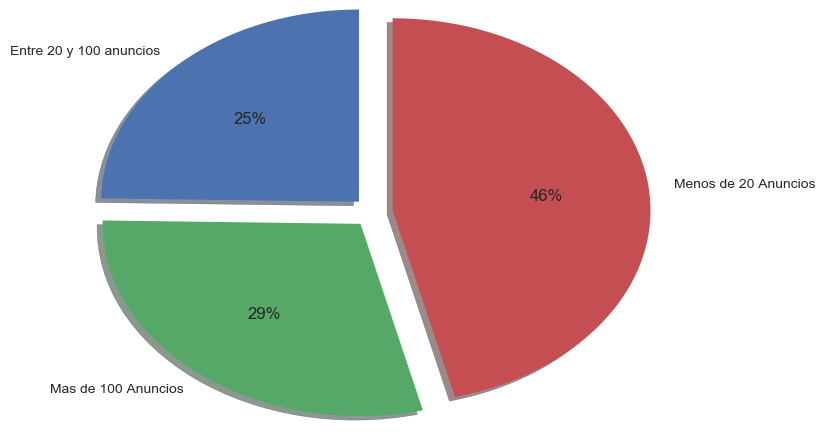

In [359]:
pie_chart = plt.pie([otros,mas_de_100,menos_de_20], labels = ['Entre 20 y 100 anuncios','Mas de 100 Anuncios','Menos de 20 Anuncios'],shadow=True,startangle=90,radius=1.3,explode=(0.1,0.1,0.1),autopct='%1.0f%%')

In [360]:
#Trabajar con las postulaciones unicamente.

Text(0,0.5,'Cantidad')

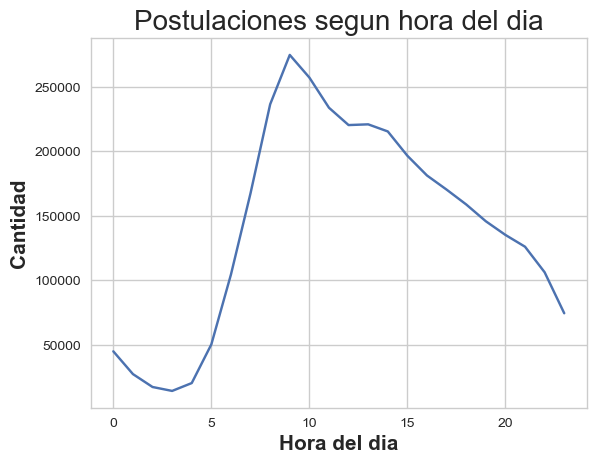

In [361]:
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'])
plot = postulaciones_df['fechapostulacion'].dt.hour.value_counts().sort_index().plot()
plot.set_title('Postulaciones segun hora del dia', fontsize = 20)
plot.set_xlabel('Hora del dia', fontsize = 15, weight = 'bold')
plot.set_ylabel('Cantidad', fontsize = 15, weight = 'bold')

Viendo el grafico se puede notar que el rango horario mas activo en cuanto a postulaciones es la media mañana. El flujo de gente que ingresa en este horario al sitio es considerable.

In [362]:
df = postulantes_edu_df.merge(postulaciones_df, on='idpostulante')
df['cantidad'] = 1
df.groupby('nombre').agg({'cantidad':'count'}).sort_values(by = 'cantidad')

,cantidad
nombre,
Doctorado,3552
Master,58514
Posgrado,116924
Otro,508217
Terciario/Técnico,864464
Universitario,1916208
Secundario,2060789


Text(0,0.5,'Nivel academico')

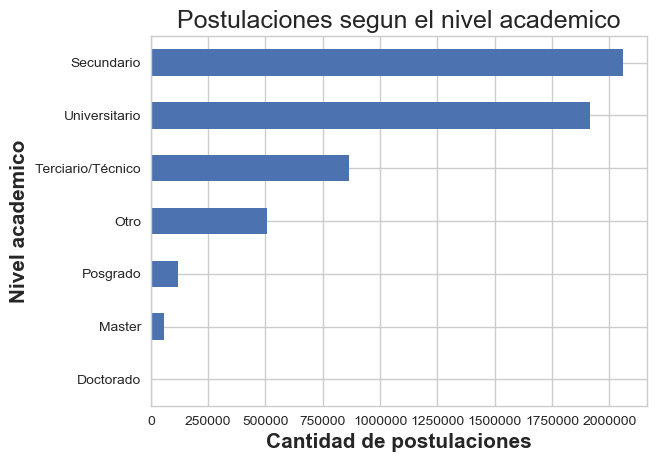

In [363]:
plot = df.groupby('nombre').agg({'cantidad':'count'}).sort_values(by = 'cantidad').plot(kind = 'barh', legend = False)
plot.set_title('Postulaciones segun el nivel academico', fontsize = 18)
plot.set_xlabel('Cantidad de postulaciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Nivel academico', fontsize = 15, weight = 'bold')

In [364]:
#Flitrar nivel academico por estado completado.

Text(0,0.5,'Cantidad')

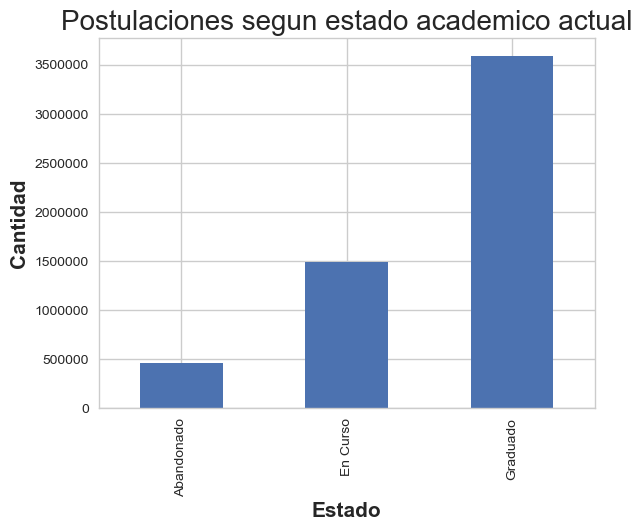

In [365]:
plot = df.groupby('estado').agg({'cantidad':'count'}).plot(kind = 'bar', legend = False)
plot.set_title('Postulaciones segun estado academico actual', fontsize = 20)
plot.set_xlabel('Estado', fontsize = 15, weight = 'bold')
plot.set_ylabel('Cantidad', fontsize = 15, weight = 'bold')

In [366]:
El mayor flujo de postulaciones lo dan los postulantes graduados.

SyntaxError: invalid syntax (<ipython-input-366-ad367ec8d1cd>, line 1)

In [ ]:
df = postulantes_gye_df.merge(postulaciones_df, on='idpostulante')
plot = df['sexo'].value_counts().sort_values().plot('bar', color = ['darkblue','pink'], rot = 0)
plot.set_title('Postulaciones segun el genero', fontsize = 20)
plot.set_ylabel('Cantidad', fontsize = 15, weight = 'bold')

# Ahora queremos ver la relaciones entre las vistas y las postulaciones.

In [ ]:
#vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'] )

In [ ]:
postulaciones_df['fechapostulacion'].dt.month.value_counts()

In [ ]:
vistas_df['timestamp'].dt.month.value_counts()

Observamos que solo hay datos en comun en el mes de febrero.

In [ ]:
#Observamos que la informacion disponible es de solo la ultima semana de febrero, por lo tanto filtramos las postulaciones para esa fecha.
#Filtramos los dias que tienen datos incompletos (viernes 23 de febrero y jueves 1 de marzo).
postulaciones_filtradas = postulaciones_df[(postulaciones_df['fechapostulacion'].dt.month == 2 ) & ((postulaciones_df['fechapostulacion'].dt.day > 23) & ( postulaciones_df['fechapostulacion'].dt.day < 29)) ]
vistas = vistas_df[(vistas_df['timestamp'].dt.month == 2 ) & ((vistas_df['timestamp'].dt.day > 23) & ( vistas_df['timestamp'].dt.day < 29)) ]
postulaciones_filtradas.head()

In [ ]:
#Falta hacer un label de las lineas

fig = plt.figure() #Creates a figure for the next plot, then disapears

ax = fig.add_subplot(111)#Form and background

plt.title('Tendencia de postulaciones y vistas segun la hora',fontsize=16,fontweight='bold')

ax.set_xlabel('Horas del dia',fontsize=16)


vistas['timestamp'].dt.hour.value_counts().sort_index().plot(color='red', label = 'Vistas', legend= True)
postulaciones_filtradas['fechapostulacion'].dt.hour.value_counts().sort_index().plot(color='blue',figsize=(14,10), legend = True, label = 'Postulaciones')#Density plot
ax.set_ylabel('Cantidad',fontsize=16,)

En este grafico notamos una irregularidad entre las 5 y las 10 horas. Suponemos que la gran diferencia de vistas y postulaciones se debe a la forma en la que se recopilan los datos. Por ejemplo, puede ser que a la hora de postularse en un aviso, no se cuente la vista al mismo.

In [ ]:
#Ahora empezamos a trabajar con los datos para analizar por día.
vistas  = vistas['timestamp'].dt.weekday_name.to_frame()
vistas['timestamp'] = pd.Categorical(vistas['timestamp'], categories=['Monday','Tuesday','Wednesday','Saturday', 'Sunday'], ordered=True)
postulaciones_filtradas = postulaciones_filtradas['fechapostulacion'].dt.weekday_name.to_frame()
postulaciones_filtradas['fechapostulacion'] =pd.Categorical(postulaciones_filtradas['fechapostulacion'], categories=['Monday','Tuesday','Wednesday','Saturday', 'Sunday'], ordered=True)

In [ ]:
print(postulaciones_filtradas['fechapostulacion'].value_counts().sort_index())
print()
print(vistas['timestamp'].value_counts().sort_index())

In [ ]:

df = vistas['timestamp'].value_counts().to_frame()
df['postulaciones'] = postulaciones_filtradas['fechapostulacion'].value_counts()
df.columns = ['vistas','postulaciones']

df.sort_index(inplace=True)
df.head()


In [ ]:
g = df.plot(kind='bar', rot = 45)
g.set_title('Cantidad de vistas y postulaciones por dia', fontsize = 20)
g.set_ylabel('Cantidad', fontsize = 15, weight = 'bold')




Viendo solo una cantidad muy limitada de datos de algunos dias de febrero, podemos observar que la cantidad tanto de vistas como postulaciones disminuye considerablemente el fin de semana.

In [ ]:
#vistas promedio por persona en el rango dado

vistas_df['cantidad'] = 1
vistas_per_capita = vistas_df.groupby('idpostulante').agg({'cantidad':'count'})
vistas_per_capita['cantidad'].mean()

# ¿Las palabras en los títulos de los avisos pueden predecir o atraer postulaciones?

In [ ]:
from collections import Counter
#Hacemos una lista con todas las palabras que aparecen en los titulos y sus apariciones, sacando los chars "( ) ,"
contador_palabras_avisos = Counter(" ".join(avisos_detalle_df['titulo'].values.tolist()).lower().replace("(",'').replace(")",'').replace(",",' ').split(" ")).items()

#Formo un DF con esa lista

contador_palabras_avisos = list(contador_palabras_avisos)


contador_palabras_avisos_df = pd.DataFrame(contador_palabras_avisos)
contador_palabras_avisos_df.head()

contador_palabras_avisos_df.columns=['palabra','apariciones']
contador_palabras_avisos_df=contador_palabras_avisos_df.set_index('palabra')

#Saco los adverbios del df
adverbios=['','-','de','con','en','y','a','para','la','al','los','/']
contador_palabras_avisos_df=contador_palabras_avisos_df.drop(adverbios)

In [ ]:
plot = contador_palabras_avisos_df.sort_values(by='apariciones',ascending=False).head(20).sort_values(by='apariciones').plot(kind='barh', legend = False)
plot.set_title('Palabras mas frecuentes en titulos de avisos', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [ ]:
#Por cada postulacion contamos las palabras que aparecen en el titulo del aviso al que se postularon
contador_palabras_postulaciones = Counter(" ".join(merge_detalle_postulaciones_df['titulo'].values.tolist()).lower().replace("(",'').replace(")",'').strip(")").replace(")",'').replace(",",' ').split(" ")).items()

contador_palabras_postulaciones = list(contador_palabras_postulaciones)


contador_palabras_postulaciones_df=pd.DataFrame(contador_palabras_postulaciones)

contador_palabras_postulaciones_df.columns=['palabra','apariciones']
contador_palabras_postulaciones_df=contador_palabras_postulaciones_df.set_index('palabra')

contador_palabras_postulaciones_df=contador_palabras_postulaciones_df.drop(adverbios)


In [ ]:
plot = contador_palabras_postulaciones_df.sort_values(by='apariciones',ascending=False).head(20).sort_values(by='apariciones').plot(kind='barh', legend = False)
plot.set_title('Palabras mas frecuentes en titulos de avisos a los que se postularon', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [ ]:
# Nos quedamos con las palabras que figuran en al menos 20 avisos
contador_palabras_avisos_df_filtrado=contador_palabras_avisos_df.loc[contador_palabras_avisos_df['apariciones']>=20]

efectividad_palabras_df = contador_palabras_postulaciones_df.sort_values(by='apariciones',ascending=False) / contador_palabras_avisos_df_filtrado.sort_values(by='apariciones',ascending=False)
efectividad_palabras_df = efectividad_palabras_df.dropna()
efectividad_palabras_df.columns=['postulaciones/avisos']

In [ ]:
plot = efectividad_palabras_df.sort_values(by='postulaciones/avisos',ascending= False).tail(20).plot(kind='barh')
plot.set_title('Palabras que menos postulaciones atraen') 

In [ ]:
plot = efectividad_palabras_df.sort_values(by='postulaciones/avisos',ascending= False).head(20).sort_values(by='postulaciones/avisos').plot(kind='barh',title='Palabras que mas postulaciones atraen')
plot.set_title('Palabras que mas postulaciones atraen')

Algunas conclusiones: Puede verse que el empleo de cajero tiene significativamente más postulaciones por aviso que los demás, lo que explica el por qué el area de ventas figura en la primer posicion del top de areas con mas postulaciones. Tambien puede verse que los anuncios con palabras relacionadas a programación tienen relativamente muy pocas postulaciones (¿Algo bueno para nosotros?). Ademas, si bien analista es la palabra que mas aparece en los titulos de las postulaciones, esto seguramente se deba a que es la que mas figura en todos los avisos en general.